## Домашнее задание №7
### *Царитова Нина*



### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте: https://contest.yandex.ru/contest/9963/run-report/18506469/

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [27]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [28]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

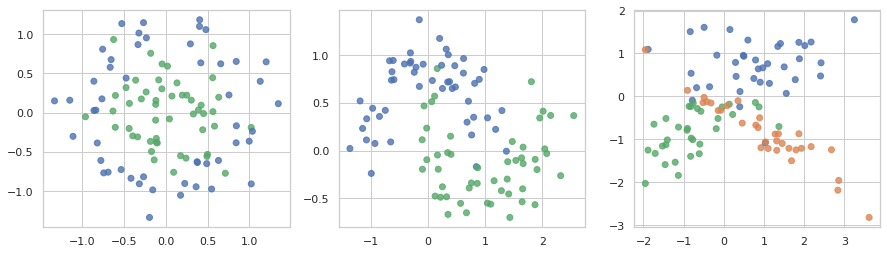

In [29]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [30]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

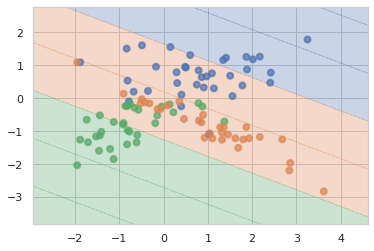

In [31]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

датасет 0
обучающая accuracy: 1.0
тестовая accuracy: 0.7

датасет 1
обучающая accuracy: 1.0
тестовая accuracy: 0.8

датасет 2
обучающая accuracy: 1.0
тестовая accuracy: 0.8



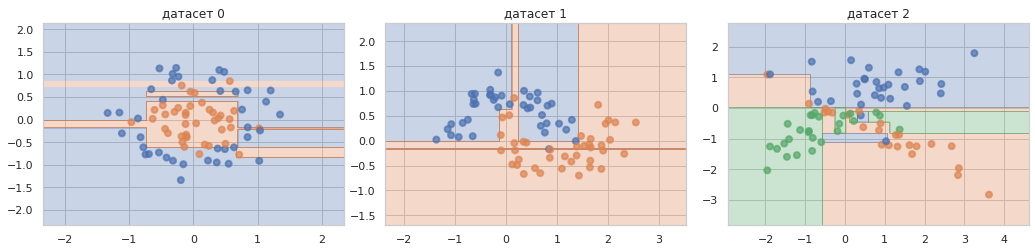

In [32]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier().fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('датасет %i' %i)
    print('датасет', i)
    print('обучающая accuracy:', tree.score(x_train, y_train))
    print('тестовая accuracy:', tree.score(x_test, y_test))
    print()
    

__Ответ:__ Точность на обучающей выборке составляет 100%, в то время как на тестовой она намного ниже. Это свидетельствует о наличии сильного переобучения. Это видно и на построенных изображениях разделяющих поверхностей: даже для сильно отстоящих от своего класса, скорее всего являющихся выбросами, объектов, построена своя разделяющая поверхность.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

датасет 0
обучающая accuracy: 0.9125
тестовая accuracy: 0.9

датасет 1
обучающая accuracy: 0.9625
тестовая accuracy: 0.8

датасет 2
обучающая accuracy: 0.9125
тестовая accuracy: 0.85



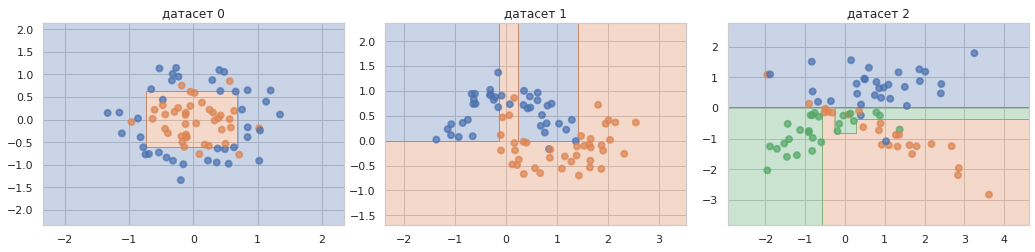

In [39]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(min_samples_leaf=4).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('датасет %i' %i)
    print('датасет', i)
    print('обучающая accuracy:', tree.score(x_train, y_train))
    print('тестовая accuracy:', tree.score(x_test, y_test))
    print()

min_samples_leaf=3

датасет 0
обучающая accuracy: 0.9375
тестовая accuracy: 0.85

датасет 1
обучающая accuracy: 0.975
тестовая accuracy: 0.9

датасет 2
обучающая accuracy: 0.9375
тестовая accuracy: 0.8



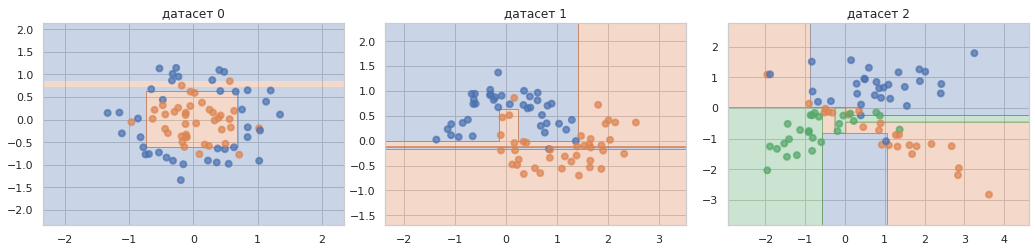

In [44]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(min_samples_leaf=2).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('датасет %i' %i)
    print('датасет', i)
    print('обучающая accuracy:', tree.score(x_train, y_train))
    print('тестовая accuracy:', tree.score(x_test, y_test))
    print()

max_depth=4

датасет 0
обучающая accuracy: 1.0
тестовая accuracy: 0.85

датасет 1
обучающая accuracy: 1.0
тестовая accuracy: 0.8

датасет 2
обучающая accuracy: 1.0
тестовая accuracy: 0.8



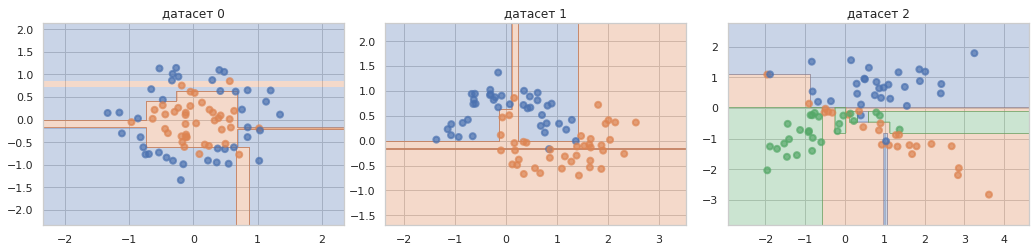

In [46]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(max_depth=10).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('датасет %i' %i)
    print('датасет', i)
    print('обучающая accuracy:', tree.score(x_train, y_train))
    print('тестовая accuracy:', tree.score(x_test, y_test))
    print()

датасет 0
обучающая accuracy: 0.8
тестовая accuracy: 0.7

датасет 1
обучающая accuracy: 0.9375
тестовая accuracy: 0.8

датасет 2
обучающая accuracy: 0.8625
тестовая accuracy: 0.95



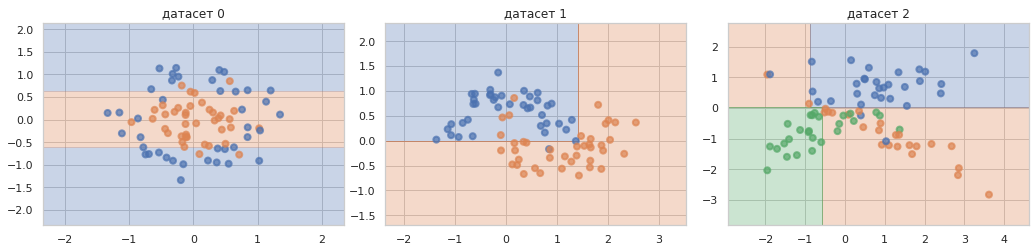

In [49]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=127)
    tree = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    plt.title('датасет %i' %i)
    print('датасет', i)
    print('обучающая accuracy:', tree.score(x_train, y_train))
    print('тестовая accuracy:', tree.score(x_test, y_test))
    print()

Увеличение максимально возможного числа объектов в листе и уменьшение максмально возможной глубины дерева приводит к снижению сложности модели и повышению обобщающей способности, дерево меньше подгоняется под особенности обучающей выборки.

Так как первая выборка имеет простую форму разделяющей поверхности, то лучшие результаты достигаются при наибольшем из рассмотренных значений параметра min_samples_leaf и наименьшем значении max_depth. Изменение параметров приводит к выделению отдельных сплитов для шумовых объектов.

Вторая выборка имеет чуть более сложную форму, для передачи которой нужно чуть более сложно устроенное дерево(видно по результатам экспериментов с min_samples_list), но общие тенденции схожи с первой выборкой.

Множества объектов, принадлежащих разным классам в третьей выборке, накладываются друг на друга, поэтому их невозможно точно разделить. Поэтому результаты разделения третьей выборки во всех экспериментах хуже остальных, быстро наступает переобучение.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [50]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    sorted_ind = np.argsort(feature_vector)
    feat_sort = feature_vector[sorted_ind]
    target_sort = target_vector[sorted_ind]
    mask = feat_sort[1:] != feat_sort[:-1]
    threshold_vec = ((feat_sort[1:] + feat_sort[:-1]) / 2)[mask]

    R = np.size(target_sort)
    R_l_size = np.arange(1, R)
    R_l_1 = np.cumsum(target_sort)
    R_l_p1 = R_l_1[:-1] / R_l_size
    R_l_p0 = 1 - R_l_p1

    R_r_1 = R_l_1[-1] - R_l_1[:-1]
    R_r_p1 = R_r_1 / (R - R_l_size)
    R_r_p0 = 1 - R_r_p1

    gini_vec = R_l_size / R * (R_l_p0 ** 2 + R_l_p1 ** 2 - 1) + \
        (R - R_l_size) / R * (R_r_p0 ** 2 + R_r_p1 ** 2 - 1)
    gini_vec = gini_vec[mask]

    ind_best = np.argmax(gini_vec)
    threshold_best = threshold_vec[ind_best]
    gini_best = gini_vec[ind_best]

    return threshold_vec, gini_vec, threshold_best, gini_best


__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [96]:
data = pd.read_csv('agaricus-lepiota.data')

In [97]:
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [98]:
from sklearn.preprocessing import LabelEncoder

for i in range(len(data.columns)):
    data.iloc[:, i] = LabelEncoder().fit_transform(data.iloc[:, i])
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [99]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], train_size=0.7, random_state=42)
tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy:', tree.score(X_test, y_test))
print('Depth:', tree.get_depth())

Accuracy: 1.0
Depth: 7


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [158]:
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [159]:
for i in range(len(tic_tac_toe.columns)):
    tic_tac_toe.iloc[:, i] = LabelEncoder().fit_transform(tic_tac_toe.iloc[:, i])
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


In [160]:
tic_t = np.array(tic_tac_toe['positive'])
tic_f = np.array(tic_tac_toe.drop('positive', axis = 1))
x_train, x_test, y_train, y_test = train_test_split(tic_f, tic_t, test_size = 0.2, random_state = 42)
depth_acc, split_acc, leaf_acc = np.zeros(20), np.zeros(20), np.zeros(20)
for i in range(20):
    dt_depth = DecisionTreeClassifier(max_depth = i + 1).fit(x_train, y_train)
    dt_split = DecisionTreeClassifier(min_samples_split = i + 2).fit(x_train, y_train)
    dt_leaf = DecisionTreeClassifier(min_samples_leaf = i + 1).fit(x_train, y_train)
    depth_acc[i] = dt_depth.score(x_test, y_test)
    split_acc[i] = dt_split.score(x_test, y_test)
    leaf_acc[i] = dt_leaf.score(x_test, y_test)

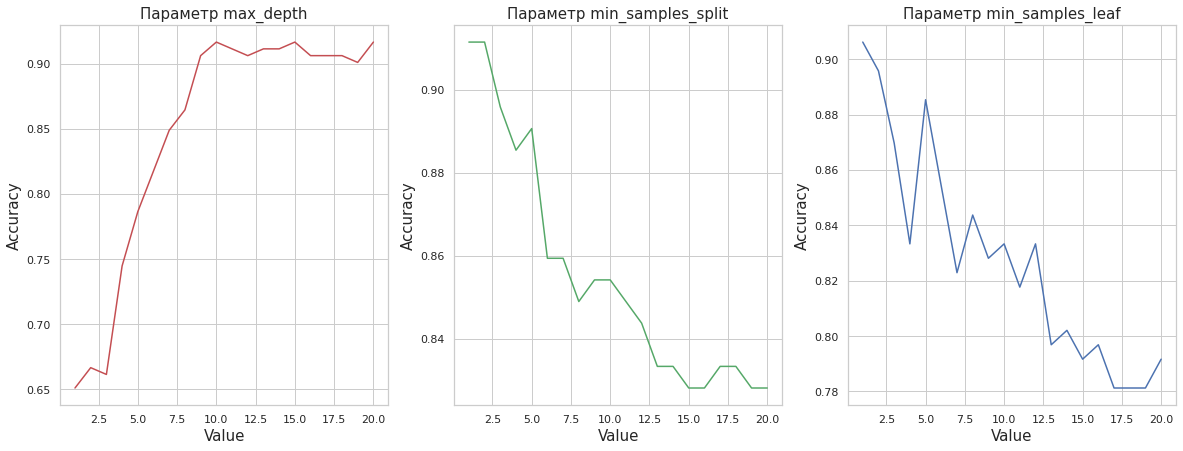

In [161]:
fig, ax = plt.subplots(1, 3, figsize = (20, 7))
xx = np.arange(1, 21)
xx_split = np.arange(2, 22)
ax[0].plot(xx, depth_acc, color = 'r')
ax[1].plot(xx, split_acc, color = 'g')
ax[2].plot(xx, leaf_acc, color = 'b')
ax[0].set_title('Параметр max_depth', fontsize = 15)
ax[1].set_title('Параметр min_samples_split', fontsize = 15)
ax[2].set_title('Параметр min_samples_leaf', fontsize = 15)
for i in range(0,3):
    ax[i].set_xlabel('Value', fontsize = 15)
    ax[i].set_ylabel('Accuracy', fontsize = 15)

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [162]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [163]:
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

In [164]:
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


In [165]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [166]:
cars.loc[(cars['unacc'] == 'unacc'), 'unacc'] = 'acc'
cars.loc[(cars['unacc'] == 'vgood'), 'unacc'] = 'good'
cars['unacc'].unique()

array(['acc', 'good'], dtype=object)

In [167]:
for i in range(len(cars.columns)):
    cars.iloc[:, i] = LabelEncoder().fit_transform(cars.iloc[:, i])
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,1
1724,1,1,3,2,0,1,0
1725,1,1,3,2,0,2,1


In [168]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [169]:
for i in range(len(nursery.columns)):
    nursery.iloc[:, i] = LabelEncoder().fit_transform(nursery.iloc[:, i])
nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2,1,0
12955,0,4,2,3,1,1,2,0,1
12956,0,4,2,3,1,1,1,2,0
12957,0,4,2,3,1,1,1,1,0


In [175]:
def algs(feat, targ):
    result_dict = {}
    result_dict['accuracy'] = [cross_val_score(DecisionTreeClassifier(), feat.values, targ, cv=15).mean()]
    return result_dict

In [176]:
feat_list = []
feat_list.append(data.drop(columns='p'))
feat_list.append(tic_tac_toe.drop(columns='positive'))
feat_list.append(cars.drop(columns='unacc'))
feat_list.append(nursery.drop(columns='recommend'))

In [177]:
targ_list = []
targ_list.append(data['p'].values)
targ_list.append(tic_tac_toe['positive'].values)
targ_list.append(cars['unacc'].values)
targ_list.append(nursery['recommend'].values)

In [178]:
rows_list = ['mushrooms', 'tic_tac_toe', 'cars', 'nursery']
columns_list = ['accuracy']

In [182]:
df = pd.DataFrame(columns=columns_list)
for i in range(4):
    curr_dict = algs(feat_list[i], targ_list[i])
    curr_dict[''] = rows_list[i]
    df = df.append(curr_dict, ignore_index=True)
df.set_index('')

,accuracy
,
mushrooms,[0.9985212569316082]
tic_tac_toe,[0.7891534391534393]
cars,[0.9635382308845577]
nursery,[0.9998456790123457]
